# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [333]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [334]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
import scipy.stats as stats

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

<font color="blue">The dataset I will be working with is the World Happiness Report (WHR). I will be predicting the condidence in national government score making this a regression problem. A company can create vaue from this model because the confidence a country’s citizens have in its national government can also correlate to how much stability there is in that country. This can help companies understand where to establish or remove their businesses. This is because more confidence in the government can increase business investment and economic growth. This can also help non-profit organizations understand where they can help out or send resources if needed. </font>

In [335]:
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
dfraw = pd.read_csv(WHRDataSet_filename, header=0)
dfraw.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

<font color="blue">I will be renaming all the columns so that they are shorter and easier to read</font>

In [336]:
renaming = {
    'country':'Country',
    'year': 'Year',
    'Life Ladder': 'Life Ladder',
    'Log GDP per capita': 'LogGDP',
    'Social support': 'Social Support',
    'Healthy life expectancy at birth': 'Life Exp.',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Corruption',
    'Positive affect': 'Positive',
    'Negative affect': 'Negative',
    'Confidence in national government': 'Confidence in Govt',
    'Democratic Quality': 'Democratic Quality',
    'Delivery Quality': 'Delivery Quality',
    'Standard deviation of ladder by country-year': 'STD Ladder by Year',
    'Standard deviation/Mean of ladder by country-year': 'STD/Mean Ladder by Year',
    'GINI index (World Bank estimate)':'GINI Index',
    'GINI index (World Bank estimate), average 2000-15': 'GINI Avg 2000-15',
    'gini of household income reported in Gallup, by wp5-year': 'GINI Household Income'
}
    
df = dfraw[dfraw.columns].rename(renaming, axis=1)
df

,Country,Year,Life Ladder,LogGDP,Social Support,Life Exp.,Freedom,Generosity,Corruption,Positive,Negative,Confidence in Govt,Democratic Quality,Delivery Quality,STD Ladder by Year,STD/Mean Ladder by Year,GINI Index,GINI Avg 2000-15,GINI Household Income
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [337]:
df.head(20)

,Country,Year,Life Ladder,LogGDP,Social Support,Life Exp.,Freedom,Generosity,Corruption,Positive,Negative,Confidence in Govt,Democratic Quality,Delivery Quality,STD Ladder by Year,STD/Mean Ladder by Year,GINI Index,GINI Avg 2000-15,GINI Household Income
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [338]:
# What is the size of my dataset?
print(df.shape)
# What are my features and their datatypes?
print(df.dtypes)

(1562, 19)
Country                     object
Year                         int64
Life Ladder                float64
LogGDP                     float64
Social Support             float64
Life Exp.                  float64
Freedom                    float64
Generosity                 float64
Corruption                 float64
Positive                   float64
Negative                   float64
Confidence in Govt         float64
Democratic Quality         float64
Delivery Quality           float64
STD Ladder by Year         float64
STD/Mean Ladder by Year    float64
GINI Index                 float64
GINI Avg 2000-15           float64
GINI Household Income      float64
dtype: object


In [339]:
df.describe(include='all')

,Country,Year,Life Ladder,LogGDP,Social Support,Life Exp.,Freedom,Generosity,Corruption,Positive,Negative,Confidence in Govt,Democratic Quality,Delivery Quality,STD Ladder by Year,STD/Mean Ladder by Year,GINI Index,GINI Avg 2000-15,GINI Household Income
count,1562,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
unique,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,NaN,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,NaN,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,NaN,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,NaN,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,NaN,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579


<font color="blue">

These are features that I plan to remove because of their irrelevance to the problem:
    
   - I will remove the <b>Country</b> feature because I don’t think the actual name of the country matters when determining confidence in the national government compared to other factors. Also, a country’s government can change often so the model would not be accurate for the future if this was taken into account. 
   - For the above reason, I will also remove the <b>Year</b> feature. 
   - I will also remove the <b>GINI Index</b> because more than half of these values are missing from the dataset. 
</font>

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### Step 1: Prepare the Data for Model

In [340]:
# I don't think that features year, country, are necessary or relevant to my problem so they will be removed
# Also the GINI index has too many missing values so I'll remove that too
df = df.drop(['Country', 'Year', 'GINI Index'], axis =1)
df.head(5)

,Life Ladder,LogGDP,Social Support,Life Exp.,Freedom,Generosity,Corruption,Positive,Negative,Confidence in Govt,Democratic Quality,Delivery Quality,STD Ladder by Year,STD/Mean Ladder by Year,GINI Avg 2000-15,GINI Household Income
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540


### a. Winsorize all columns
<font color="blue">I am winsorizing all columns to remove any extreme values to avoid skewing the results of the model</font>

In [341]:
for col in df.columns.values:
    # remove the top 1% and bottom 1% of values
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
df.head(5)

,Life Ladder,LogGDP,Social Support,Life Exp.,Freedom,Generosity,Corruption,Positive,Negative,Confidence in Govt,Democratic Quality,Delivery Quality,STD Ladder by Year,STD/Mean Ladder by Year,GINI Avg 2000-15,GINI Household Income
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.642179,1.774662,0.476600,NaN,NaN
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.017452,-1.635025,1.722688,0.391362,NaN,0.441906
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540


### b. Check how many missing values are in each column

In [342]:
# The code cell below counts the number of times a missing value occurs in each column. 
# It applies the isnull() method and then aggregates the results by columns using the np.sum() function.
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Life Ladder                  0
LogGDP                      27
Social Support               0
Life Exp.                    0
Freedom                     29
Generosity                  80
Corruption                  90
Positive                    18
Negative                     0
Confidence in Govt         161
Democratic Quality         171
Delivery Quality           171
STD Ladder by Year           0
STD/Mean Ladder by Year      0
GINI Avg 2000-15           176
GINI Household Income      357
dtype: int64

### c. Handle Missing Values
<font color="blue">The code below removes all null values from each column and replacing them with mean values of the column</font>

In [343]:
# fill columns which have missing values with averages of their column
# first identiify which columns having missing values and then put them into a list
columns_with_nulls = list(nan_count[nan_count != 0].index)
columns_with_nulls

['LogGDP',
 'Freedom',
 'Generosity',
 'Corruption',
 'Positive',
 'Confidence in Govt',
 'Democratic Quality',
 'Delivery Quality',
 'GINI Avg 2000-15',
 'GINI Household Income']

In [344]:
for col in columns_with_nulls:
    mean_value = df[col].mean()
    df[col].fillna(value=mean_value, inplace=True)
df.head(5)

,Life Ladder,LogGDP,Social Support,Life Exp.,Freedom,Generosity,Corruption,Positive,Negative,Confidence in Govt,Democratic Quality,Delivery Quality,STD Ladder by Year,STD/Mean Ladder by Year,GINI Avg 2000-15,GINI Household Income
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.642179,1.774662,0.476600,0.387124,0.445374
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.017452,-1.635025,1.722688,0.391362,0.387124,0.441906
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.387124,0.327318
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.387124,0.336764
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.387124,0.344540


In [345]:
print("Missing values were handled")
np.sum(df.isnull(), axis = 0)

Missing values were handled


Life Ladder                0
LogGDP                     0
Social Support             0
Life Exp.                  0
Freedom                    0
Generosity                 0
Corruption                 0
Positive                   0
Negative                   0
Confidence in Govt         0
Democratic Quality         0
Delivery Quality           0
STD Ladder by Year         0
STD/Mean Ladder by Year    0
GINI Avg 2000-15           0
GINI Household Income      0
dtype: int64

### d. Identify Features With the Highest Correlation With the Label

In [346]:
corrs = df.corr()['Confidence in Govt'].drop('Confidence in Govt', axis = 0)
corrs_sorted = corrs.sort_values(ascending=False)
print(corrs_sorted)
print("This is the size of corrs_sorted" + str(corrs_sorted.size))

Freedom                    0.383075
Generosity                 0.259268
GINI Household Income      0.153331
Positive                   0.135483
GINI Avg 2000-15           0.049225
STD/Mean Ladder by Year   -0.017544
Delivery Quality          -0.042113
Life Ladder               -0.084923
Democratic Quality        -0.130009
Negative                  -0.133589
Social Support            -0.153227
LogGDP                    -0.153882
STD Ladder by Year        -0.171935
Life Exp.                 -0.183406
Corruption                -0.411477
Name: Confidence in Govt, dtype: float64
This is the size of corrs_sorted15


<font color="blue">Since GINI Avg 2000-15, STD Ladder by Year, Delivery Quality, and Life Ladder seem to have little to no correlation with the label, they will be dropped. </font>

In [347]:
df.drop(['GINI Avg 2000-15', 
         'STD/Mean Ladder by Year', 
         'Delivery Quality', 'Life Ladder'], axis=1)
df.shape

(1562, 16)

<font color="blue">Below are pairplots representing the correlation of the rest of the features with the 'Confidence in Govt' label</font>

In [348]:
df_sub1 = df[['Confidence in Govt', 'LogGDP', 
              'Social Support', 'Life Exp.', 
              'Freedom']].copy()

df_sub2 = df[['Confidence in Govt', 
              'Generosity', 'Corruption', 
              'Positive', 'Negative']].copy()

df_sub3 = df[['Confidence in Govt', 'Democratic Quality', 
              'STD Ladder by Year', 
              'GINI Household Income']].copy()


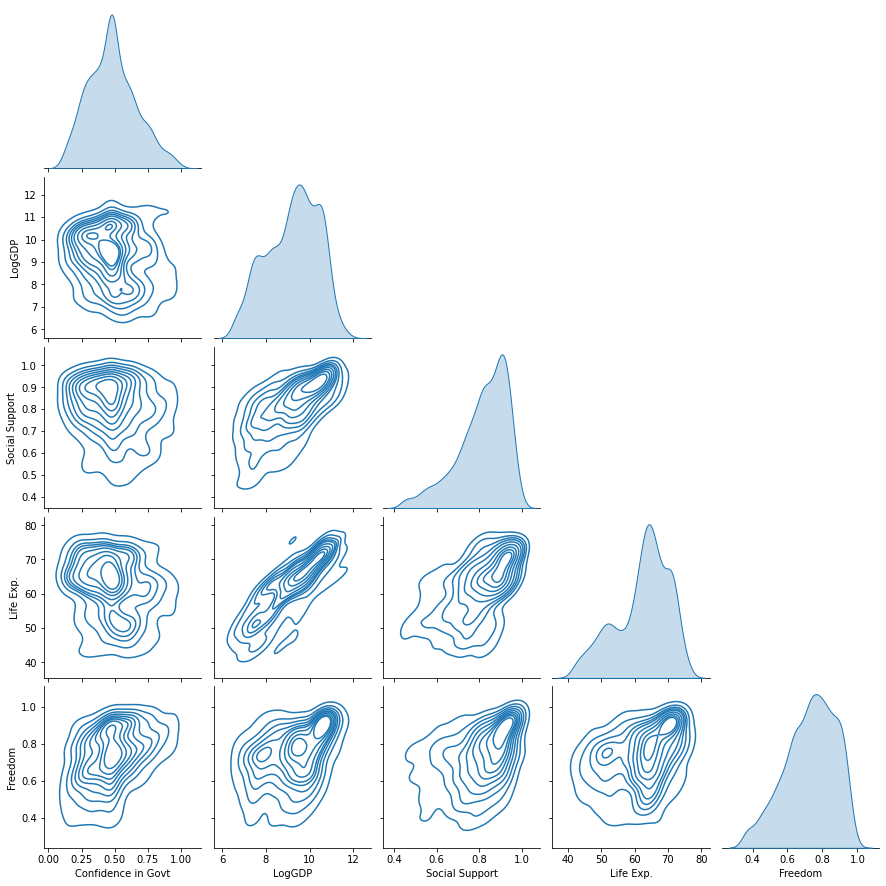

In [349]:
sns.pairplot(data=df_sub1, kind='kde', corner=True)

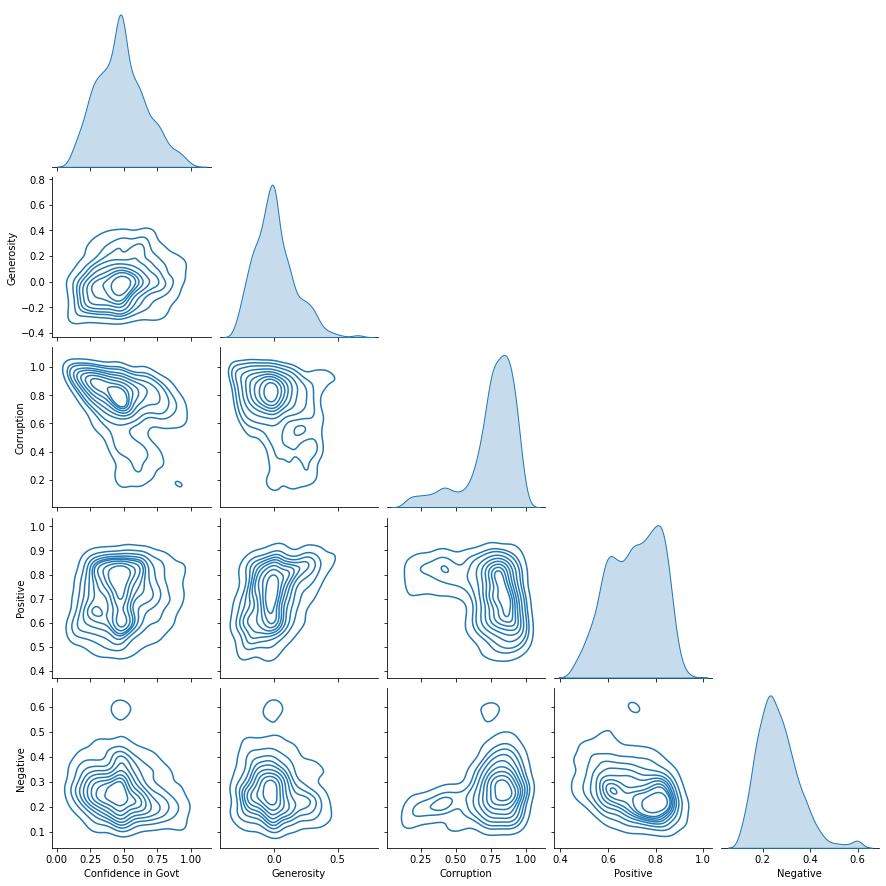

In [350]:
sns.pairplot(data=df_sub2, kind='kde', corner=True)

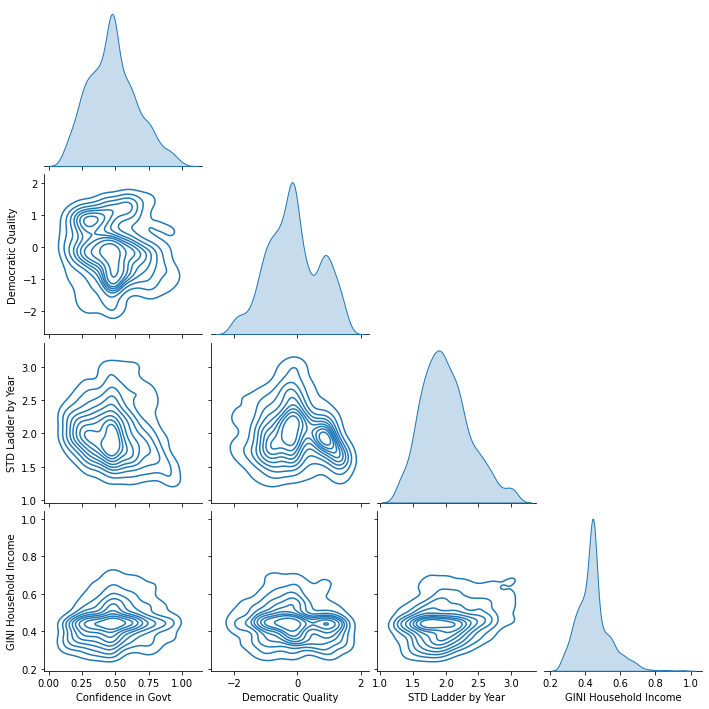

In [351]:
sns.pairplot(data=df_sub3, kind='kde', corner=True)

<font color="blue"> After analyzing the above graphs, I can see that many of the features in this dataset are correlated to one another. However, there is no clear linear relationship between the features and label. This is because the contour plots do not have data moving in the same direction (like the Log GDP vs Life Exp graph does). They are all oddly shaped and spaced all over the graph. Hence a **linear regression model would not be suitable for this dataset**. Using a **Decision Tree or KNN Model** would be better in this case. </font>

### Step 4: Create Features and Labels

In [352]:
X = df.drop(columns = 'Confidence in Govt', axis =1) # features
y = df['Confidence in Govt'] # label

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [354]:
print(X_train.shape)
print(X_test.shape)

(1046, 15)
(516, 15)


### Step 5: Fit and Evaluate Models
<font color="blue"> As mentioed earlier I will be using fitting my data on both a KNN and DT model. I will be testing them both on different hyperparameter values so that we can achieve optimal results. For the KNN model this will be done using a for loop where as for the DT model, I will be using grid search.</font>

### a. KNN Model

In [355]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors Regressor to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    # 1. Create the  KNeighborsRegressor model object below and assign to variable 'model'
    model = KNeighborsRegressor(n_neighbors=k)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train) 
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_prediction = model.predict(X_test)

    print("\nModel Performance for KNN Model with K =", str(k))
    print("RMSE = %.2f" % np.sqrt(mean_squared_error(y_test, class_label_prediction)))
    print("R^2 = %.2f" % r2_score(y_test, class_label_prediction))
    

# Create and evaluate KNN models of different K values
k_values = [2, 4, 6, 8, 10,100]
for k in k_values:
    train_test_knn(X_train, X_test, y_train, y_test, k)


Model Performance for KNN Model with K = 2
RMSE = 0.12
R^2 = 0.58

Model Performance for KNN Model with K = 4
RMSE = 0.12
R^2 = 0.52

Model Performance for KNN Model with K = 6
RMSE = 0.13
R^2 = 0.50

Model Performance for KNN Model with K = 8
RMSE = 0.13
R^2 = 0.47

Model Performance for KNN Model with K = 10
RMSE = 0.13
R^2 = 0.46

Model Performance for KNN Model with K = 100
RMSE = 0.17
R^2 = 0.16


<font color="blue">As you can see from the above results, the RMSE value and R2 value does not seem to change for different K values.</font>

### b. Decision Tree with Grid Search

In [356]:
# ==== Set up parameter grid ==== #
md = [2**n for n in range(2,6)]
msl = [25*2**n for n in range(0,3)]
param_grid={'max_depth':md, 'min_samples_leaf':msl}

# ==== Perform Grid Search Cross Validation ==== #
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor() model object without supplying arguments
gscv_model = DecisionTreeRegressor()

# 2. Run a Grid Search with 5-fold cross-validation using our the model.
#   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(gscv_model, param_grid, cv=5)

# 3. Fit the model to the training data and assign the fitted model to the variable grid_search
grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


### c. Evaluate Decision Tree and Identify Optimal Hyperparameter Values

In [357]:
best_md = grid_search.best_estimator_.max_depth
best_msl = grid_search.best_estimator_.min_samples_leaf

# Print best performing hyperparameter configuration
print('Best value for max depth: {0}'.format(best_md))
print('Best value for the minimum number of samples required to be at a leaf node: {0}'
      .format(best_msl))

# Print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for max depth: 16
Best value for the minimum number of samples required to be at a leaf node: 25
Accuracy score: 0.4000456931000718


In [358]:
# Create Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=16 , min_samples_leaf=25)

# 2. Fit the model to the training data below
dt_model.fit(X_train, y_train) 

# 3. Make predictions on the test data below and assign the result to the variable 'continuous_label_predictions'
dt_prediction = dt_model.predict(X_test) 

# The mean squared error and R2 score
print('\nModel Performance for Decision Tree Model\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, dt_prediction)))
print(' R^2 =   %.2f'% r2_score(y_test, dt_prediction))



Model Performance for Decision Tree Model

RMSE =   0.13
 R^2 =   0.48


In [359]:
print('Range of Confidence in Govt values: %.2f to %.2f' % (df['Confidence in Govt'].min(), df['Confidence in Govt'].max()))

Range of Confidence in Govt values: 0.13 to 0.99


<font color="blue">
RMSE (Root Mean Squared Error) measures the difference between the actual values and the predicted values of a model. A lower RMSE value indicates better performance, as it means the difference between the actual values and predicted values is small, and the model makes accurate predictions. <br>

The KNN model and DT model produced an RMSE value of 0.13 and 0.14 which means that the predictions are off by 0.13 and 0.14 units which is pretty small considering the fact that the range of values is from 0.13 to 0.99.

On the other hand, R^2 explains how well the model fits the data it was trained on. A higher R2 value indicates that the model fits the data very well, whereas a lower R2 value indicates the opposite. Here the R2 value for KNN was 0.55 and DT was 0.48. This means for both models only about 48% to 55% of the variation in the 'Confidence in Govt' label was explained by the features. Although, the KNN model performed okay, we should try using feature selection and ensemble techniques to get a better model for our data.
<font>


### Step 5: Feature Selection

In [360]:
#1. Obtain "feature importance" scores from the model object and save the array to the variable 
# 'feature_imp'
feature_imp = dt_model.feature_importances_

#2. Create a Pandas DataFrame with a list of all features and their scores. 
# Save the result to the variable 'df_features'
df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})

#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'
df_sorted = df_features.sort_values('imp', ascending=False)
print(df_sorted)

#4. Obtain the top 5 sorted feature names and save the result to list 'top_five' 
top_five = df_sorted.iloc[:5]['name'].tolist()
print('Top five features: {0}'.format(top_five))


                       name       imp
6                Corruption  0.440504
4                   Freedom  0.163343
0               Life Ladder  0.118690
3                 Life Exp.  0.109601
1                    LogGDP  0.073809
8                  Negative  0.037356
11       STD Ladder by Year  0.022253
10         Delivery Quality  0.021837
2            Social Support  0.004881
9        Democratic Quality  0.004723
7                  Positive  0.003003
5                Generosity  0.000000
12  STD/Mean Ladder by Year  0.000000
13         GINI Avg 2000-15  0.000000
14    GINI Household Income  0.000000
Top five features: ['Corruption', 'Freedom', 'Life Ladder', 'Life Exp.', 'LogGDP']


<font color="blue">Based on the above results, I can see that the top features are 'Corruption', 'Freedom', 'Life Ladder', 'Life Exp.', 'LogGDP'. The other features have little to no influence on predicting the final label, therefore they should not be considered when making the model. These will be dropped an not used when using the ensembling techniques. </font>

In [361]:
df2 = df[['Corruption', 'Freedom', 'Life Ladder', 'Life Exp.', 'LogGDP', 'Confidence in Govt']]
X = df2.drop(columns = 'Confidence in Govt', axis =1) # features
y = df2['Confidence in Govt'] # label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
X_train.shape

(1046, 5)

### Step 6: Model Selection

### a. Building Random Forest

In [362]:
for n in [20,40,60,80,100,200]:
    print('Begin Random Forest Implementation...')
    # 1. Create the RandomForestRegressor model object below
    rf_model = RandomForestRegressor( n_estimators=n);

    # 2. Fit the model to the training data below
    rf_model.fit(X_train, y_train)

    # 3. Make predictions on the test data using the predict method
    rf_prediction = rf_model.predict(X_test) 

    # The mean squared error and R2 score
    print('\nModel Performance for Random Forest Model for n = ' + str(n) + '\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, rf_prediction)))
    print(' R^2 =   %.2f' % r2_score(y_test, rf_prediction))


Begin Random Forest Implementation...

Model Performance for Random Forest Model for n = 20

RMSE =   0.12
 R^2 =   0.57
Begin Random Forest Implementation...

Model Performance for Random Forest Model for n = 40

RMSE =   0.12
 R^2 =   0.56
Begin Random Forest Implementation...

Model Performance for Random Forest Model for n = 60

RMSE =   0.12
 R^2 =   0.56
Begin Random Forest Implementation...

Model Performance for Random Forest Model for n = 80

RMSE =   0.12
 R^2 =   0.56
Begin Random Forest Implementation...

Model Performance for Random Forest Model for n = 100

RMSE =   0.12
 R^2 =   0.57
Begin Random Forest Implementation...

Model Performance for Random Forest Model for n = 200

RMSE =   0.12
 R^2 =   0.57


<font color="blue"> I can see from the above results, the RMSE value stayed the same for all n_estimators values. The R2 values however did change and was the greatest when n_estimators = 80.</font>

### b. Building a Gradient Boosting Regressor model

In [363]:
for n in [10, 40, 60 , 80]:
    print('Begin GBDT Implementation...')
    # 1. Create the GradientBoostingRegressor model object below and assign to variable 'gbdt_2_model'
    gbdt_model = GradientBoostingRegressor(n_estimators = 100, max_depth = n)

    # 2. Fit the model to the training data below
    gbdt_model.fit(X_train, y_train)

    # 3. Make predictions on the test data using the predict method
    gbdt_prediction = rf_model.predict(X_test) 

    # The mean squared error
    print('\nModel Performance for Random Forest Model for n = ' + str(n) + '\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, gbdt_prediction )))
    print(' R^2 =   %.2f' % r2_score(y_test, gbdt_prediction ))
    


Begin GBDT Implementation...

Model Performance for Random Forest Model for n = 10

RMSE =   0.12
 R^2 =   0.57
Begin GBDT Implementation...

Model Performance for Random Forest Model for n = 40

RMSE =   0.12
 R^2 =   0.57
Begin GBDT Implementation...

Model Performance for Random Forest Model for n = 60

RMSE =   0.12
 R^2 =   0.57
Begin GBDT Implementation...

Model Performance for Random Forest Model for n = 80

RMSE =   0.12
 R^2 =   0.57


<font color="blue"> I can see from the above results, the RMSE value and R2 values did not change for any of the different n_estimators and max_depth values.</font>

### Summary

<font color="blue"> 
- KNN Model: RMSE = 0.12, R2 = 0.58
- DT Model: RMSE = 0.13, R2 = 0.48
- Random Forest: RMSE = 0.12, R2 = 0.57
- Gradient Boosting Regressor Model: RMSE = 0.12, R2 = 0.57

The RMSE and R2 scores I achieved after doing feature selection and using ensemble methods were not better than what I had achieved by just using KNN and DT models. All of these models had the same RMSE scores but out of all these models, the decision tree model performed the worst with an RMSE value of 0.13 and an R2 value of 0.48. The best peforming model was the KNN model as it was able to get an RMSE value of 0.12 and an R2 value of 0.58 (which is pretty good the social sciences field). 
</font>
